# Amazon Echo Sentiment Analysis Project
- Author: Parth Nuwal

- Goal: Perform EDA on real customer reviews of Amazon Echo and build an AI Model (Naive Bayes Classifier Model) to predict sentiment of reviews.

- Tools used: Google Collab, Scikit-learn, Matplotlib, Seaborn, Python

- Application: Idenitifying customer sentiment is crucial for companies to know whether customers are happy or not. This project automates the process, without having the need to review all the review manually.

- References:
Data Source: https://www.kaggle.com/datasets/sid321axn/amazon-alexa-reviews


# Loading the data

In [1]:
!pip install jupyterthemes

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 45.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.7 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [5]:
df = pd.read_csv('amazon_reviews.csv')
df

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3149 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


In [11]:
df.describe()

,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


<Axes: xlabel='rating', ylabel='count'>

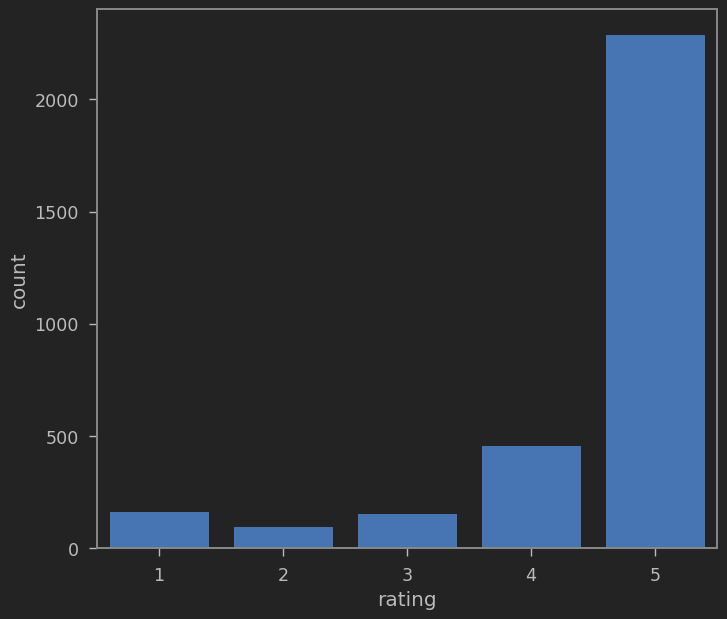

In [10]:
sns.countplot(x=df['rating'])

In [21]:
df['length']=df['verified_reviews'].str.len()
df['length'] = df['length'].fillna(0).astype(int)

<Axes: ylabel='Frequency'>

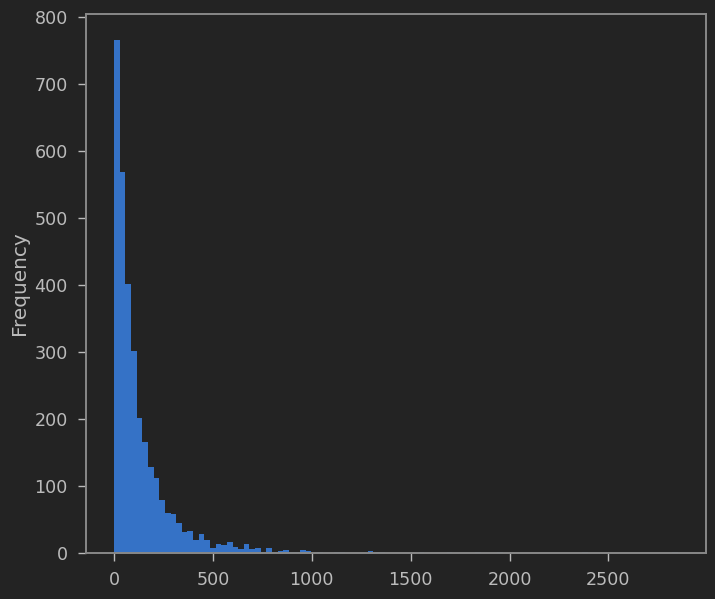

In [25]:
df['length'].plot(bins=100,kind='hist')

<Axes: xlabel='feedback', ylabel='count'>

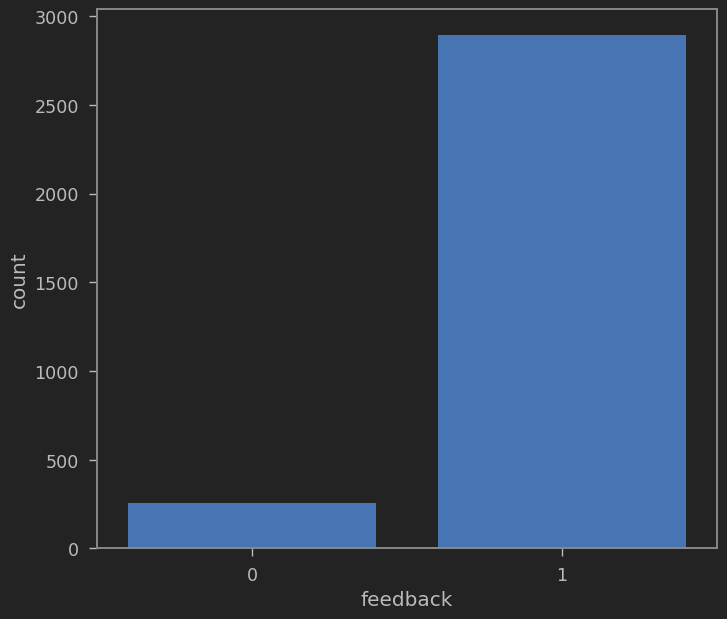

In [26]:
sns.countplot(x=df['feedback'])
#This mean we have near ~2900 to positive reviews
#and around ~250 negative reviews.

## Bifurcation into positive and negative reviews data

In [28]:
positive = df[df['feedback']==1]
negative = df[df['feedback']==0]

In [29]:
positive.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [30]:
negative.head()

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20


# Wordcloud

In [52]:
import wordcloud
from wordcloud import WordCloud


def gen_wordcloud(message):
  plt.figure(figsize=(12,12))
  wordcloud=WordCloud().generate(message)
  plt.imshow(wordcloud)

#Removing Punctuations and stop words

In [ ]:
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

def message_cleaning(message):
    punc_removed=[word for word in message if word not in string.punctuation]
    jned=''.join(punc_removed)
    stp_rm=[word for word in jned.split() if word.lower() not in stopwords.words('english')]
    return stp_rm

## For positive

In [42]:
p_as = message_cleaning(positive['verified_reviews'])
p_as= ' '.join(p_as)
p_as

'Love Echo!Loved it!Sometimes playing game, answer question correctly Alexa says got wrong answers you. like able turn lights away home.I lot fun thing. 4 yr old learns dinosaurs, control lights play games like categories. nice sound playing music well.MusicI received echo gift. needed another Bluetooth something play music easily accessible, found smart speaker. Can’t wait see else do.Without cellphone, cannot use many features. iPad see use. great alarm. u r almost deaf, hear alarm bedroom living room, reason enough keep her.It fun ask random questions hear response. seem smartbon politics yet.I think 5th one I\'ve purchased. I\'m working getting one every room house. really like features offer specifily playing music Echos controlling lights throughout house.looks greatLove it! I’ve listened songs haven’t heard since childhood! get news, weather, information! It’s great!I sent 85 year old Dad, talks constantly.I love it! Learning knew things eveyday! Still figuring everything works 

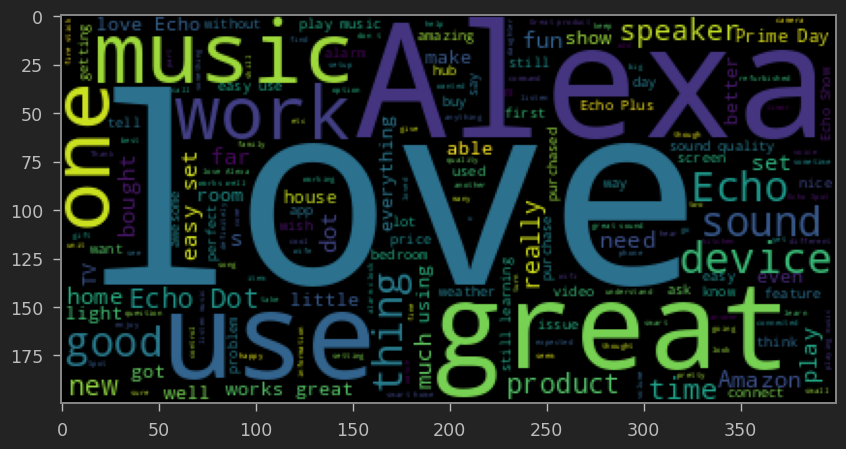

In [43]:
gen_wordcloud(p_as)

## For negative reviews

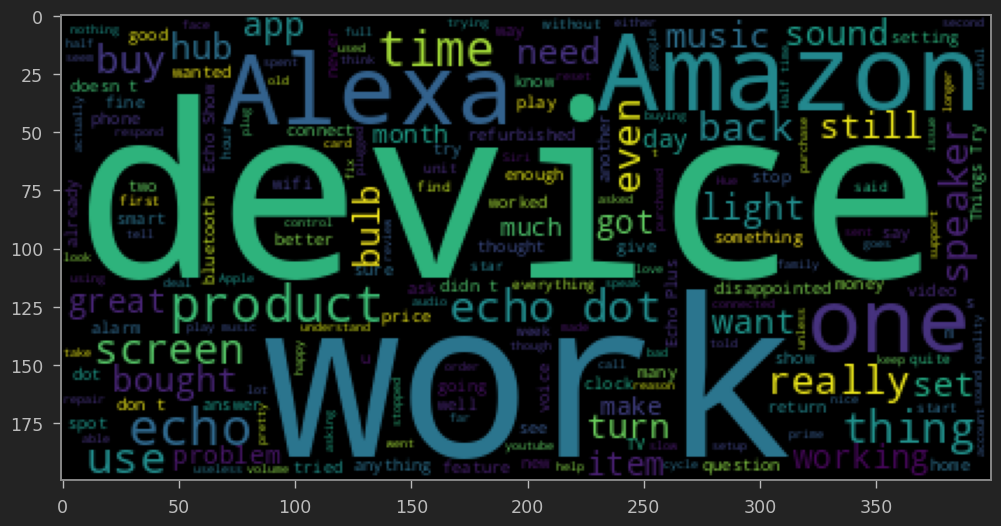

In [53]:
n_as = message_cleaning(negative['verified_reviews'].astype(str))
n_as= ' '.join(n_as)
gen_wordcloud(n_as)

# Tokenization

In [55]:
df['verified_reviews'] = df['verified_reviews'].fillna('')
df['verified_reviews'] = df['verified_reviews'].astype(str)

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer= CountVectorizer(analyzer=message_cleaning,dtype = np.uint8)
count_vector=vectorizer.fit_transform(df['verified_reviews'])

In [58]:
print(vectorizer.get_feature_names_out())
print(count_vector.toarray())

['072318' '1' '10' ... '😬' '😳' '🤓']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [61]:
count_vector.shape

(3150, 5211)

In [62]:
reviews = pd.DataFrame(count_vector.toarray())

In [64]:
X=reviews
y=df['feedback']

# Training the Model

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [66]:
from sklearn.metrics import classification_report, confusion_matrix

<Axes: >

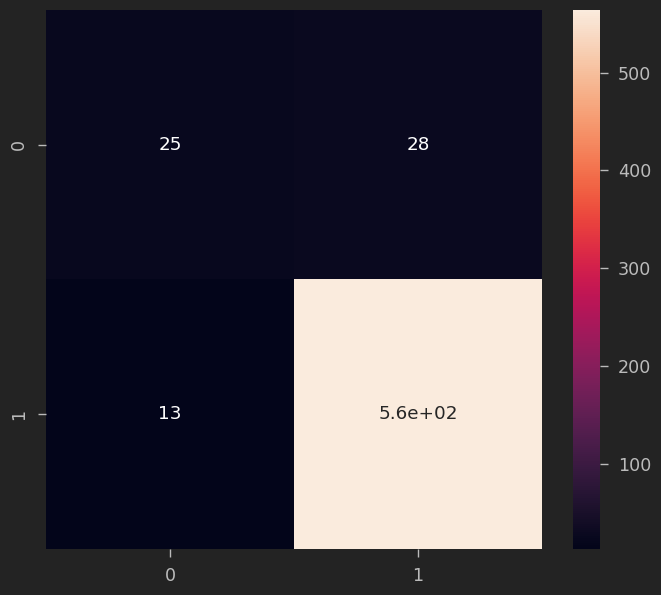

In [68]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [69]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.66      0.47      0.55        53
           1       0.95      0.98      0.96       577

    accuracy                           0.93       630
   macro avg       0.81      0.72      0.76       630
weighted avg       0.93      0.93      0.93       630



## Using Logistic Regression

              precision    recall  f1-score   support

           0       0.81      0.40      0.53        53
           1       0.95      0.99      0.97       577

    accuracy                           0.94       630
   macro avg       0.88      0.69      0.75       630
weighted avg       0.94      0.94      0.93       630



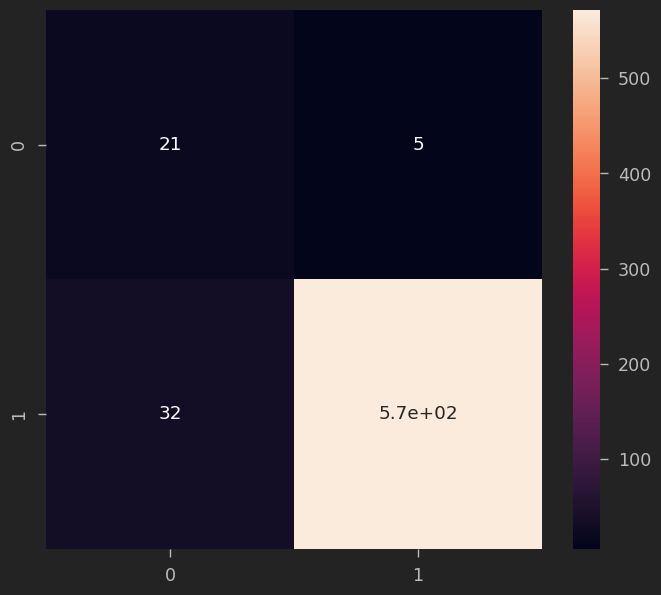

In [70]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

#Using Gradient Boosting Classifier

              precision    recall  f1-score   support

           0       0.78      0.13      0.23        53
           1       0.93      1.00      0.96       577

    accuracy                           0.92       630
   macro avg       0.85      0.56      0.59       630
weighted avg       0.91      0.92      0.90       630



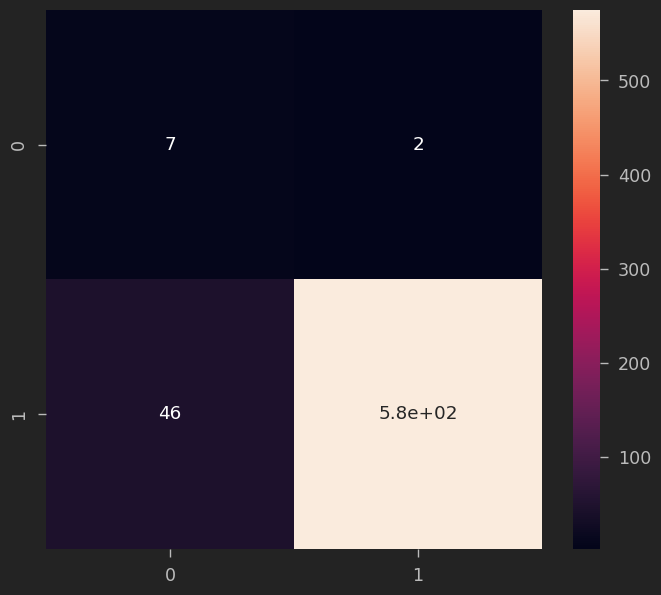

In [72]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, annot = True)

print(classification_report(y_test, y_pred))

In [75]:
df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


# Thanks

In [82]:
df2 = pd.read_csv('amazon_reviews.csv')
df2

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [86]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical

# 1. Data Preparation
def prepare_data(df):
    # Convert DataFrame to ensure string type and handle potential NaN values
    df = df.copy()  # Create a copy to avoid modifying the original

    # Ensure 'feedback' column is string type and fill NaN values
    df['feedback'] = df['feedback'].astype(str).fillna('')

    # Convert ratings to sentiment classes
    df['sentiment'] = df['rating'].apply(lambda x:
        0 if x <= 2 else  # Negative
        1 if x == 3 else  # Neutral
        2 if x >= 4 else  # Positive
        0  # Default to negative
    )

    # Clean and preprocess text
    df['cleaned_text'] = df['feedback'].str.lower().str.replace('[^\w\s]', '', regex=True)

    return df

# Rest of the code remains the same as in the previous implementation
# (Tokenization, Model Creation, and Sentiment Analysis functions)
def tokenize_texts(texts, max_words=1000, max_len=100):
    # Tokenize the texts
    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)

    # Convert texts to sequences
    sequences = tokenizer.texts_to_sequences(texts)

    # Pad sequences to ensure uniform length
    padded_sequences = pad_sequences(sequences, maxlen=max_len)

    return padded_sequences, tokenizer

def create_sentiment_model(vocab_size, max_len, num_classes):
    model = Sequential([
        # Embedding layer
        Embedding(vocab_size, 128, input_length=max_len),

        # LSTM layer for sequence processing
        LSTM(128, dropout=0.2, recurrent_dropout=0.2),

        # Dropout for regularization
        Dropout(0.5),

        # Dense layers for classification
        Dense(64, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    # Compile the model
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

def perform_sentiment_analysis(df):
    # Prepare data
    prepared_df = prepare_data(df)

    # Tokenize texts
    X = prepared_df['cleaned_text']
    y = prepared_df['sentiment']

    # Tokenization
    X_padded, tokenizer = tokenize_texts(X)

    # Encode labels
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    y_categorical = to_categorical(y_encoded)

    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X_padded, y_categorical, test_size=0.2, random_state=42
    )

    # Create and train model
    vocab_size = len(tokenizer.word_index) + 1
    num_classes = y_categorical.shape[1]

    model = create_sentiment_model(vocab_size, X_padded.shape[1], num_classes)

    # Train the model
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.2,
        verbose=1
    )

    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test)
    print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')

    # Prediction function
    def predict_sentiment(text):
        # Preprocess text
        cleaned_text = text.lower().replace('[^\w\s]', '')

        # Tokenize and pad
        sequence = tokenizer.texts_to_sequences([cleaned_text])
        padded_sequence = pad_sequences(sequence, maxlen=X_padded.shape[1])

        # Predict
        prediction = model.predict(padded_sequence)
        sentiment_class = np.argmax(prediction)

        # Map back to original sentiment
        sentiment_labels = ['Negative', 'Neutral', 'Positive']
        return sentiment_labels[sentiment_class]

    return model, predict_sentiment

In [87]:
model, predict_fn = perform_sentiment_analysis(df2)

# Predict sentiment for a new review
print(predict_fn("I absolutely love this product!"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 253ms/step - accuracy: 0.8190 - loss: 0.6483 - val_accuracy: 0.8889 - val_loss: 0.2590
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 204ms/step - accuracy: 0.9451 - loss: 0.2231 - val_accuracy: 0.9544 - val_loss: 0.1838
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 220ms/step - accuracy: 0.9427 - loss: 0.2215 - val_accuracy: 0.9544 - val_loss: 0.1842
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 209ms/step - accuracy: 0.9501 - loss: 0.2052 - val_accuracy: 0.9544 - val_loss: 0.1837
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 14s 220ms/step - accuracy: 0.9553 - loss: 0.1872 - val_accuracy: 0.9544 - val_loss: 0.1827
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 216ms/step - accuracy: 0.9532 - loss: 0.1970 - val_accuracy: 0.9544 - val_loss: 0.1927
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 217ms/step - accuracy: 0.9535 - loss: 0.1952 - val_accuracy: 0.9544 - val_loss: 0.1832
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 213ms/step - accuracy: 0.9530 - loss: 0.1884 - val_accu